In [14]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
from matplotlib import pyplot
from pandas import DataFrame
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
r = tree.DecisionTreeRegressor(max_depth = 2)

### Single iteration:

In [15]:
n = 500
p = 2
noise = 30
#dataset with a linear relationship between inputs and the outputs
X, y = make_regression(n_samples=n, n_features=p, noise=noise)
data = pd.DataFrame({'X1': X[:,0], 'X2': X[:,1], 'y': y}, columns=['X1', 'X2', 'y'])

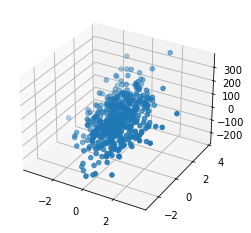

In [16]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y,cmap='binary');

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.5)
print(X_train.shape)
print(y_train.shape)
#fit the decision tree
r = r.fit(X_train, y_train)
#predict test sample
yhat = r.predict(X_test)
#array with leaf indexes for each prediction
leaf = r.apply(X_test)
#combine them into dataframe
df = pd.DataFrame({'y': y_test.squeeze(), 'yhat': yhat.squeeze(), 'leaf': leaf.squeeze()})

(250, 2)
(250,)


In [18]:
r.get_n_leaves()

4

In [19]:
df

,y,yhat,leaf
0,-20.731281,-3.501488,3
1,145.445105,185.466065,6
2,78.119543,95.100059,5
3,-48.439962,-3.501488,3
4,96.739147,95.100059,5
...,...,...,...
245,-26.163355,-3.501488,3
246,105.127778,95.100059,5
247,101.022593,95.100059,5
248,90.826573,-3.501488,3


In [20]:
leaves = df.groupby('leaf').mean()

#QUESTION which index to choose 
y_new = df.loc[df['leaf'] == leaves['yhat'].idxmax()]
pred1 = leaves['yhat'].max()
yhat1 = y_new['yhat']

In [21]:
y_new

,y,yhat,leaf
1,145.445105,185.466065,6
14,268.500221,185.466065,6
45,229.331451,185.466065,6
53,184.688754,185.466065,6
56,149.599468,185.466065,6
58,154.871609,185.466065,6
67,180.878588,185.466065,6
81,212.067295,185.466065,6
89,107.208987,185.466065,6
94,166.956561,185.466065,6


In [7]:
#average outcome in each leaf and predicted outcome in each leaf
leaves

,y,yhat
leaf,,
2,-118.942302,-109.076693
3,-3.950749,-14.338430
5,69.568102,75.181566
6,155.332804,162.473412


In [8]:
print(y_new.shape)
y_new.head()

(18, 3)


,y,yhat,leaf
0,198.657728,162.473412,6
6,90.996664,162.473412,6
21,111.932577,162.473412,6
30,129.327466,162.473412,6
33,222.368288,162.473412,6


In [9]:
#if y is in y_new -> add True in condition column
data['condition'] = data['y'].isin(y_new['y'])

#check if everything is found in data
if len(data[data['condition'] == True]) != len(y_new):
    print('Length Mismatch')

In [10]:
data.head()

,X1,X2,y,condition
0,-0.117898,-0.973366,-61.532218,False
1,0.360013,0.284696,39.073629,False
2,-0.794573,0.928414,-5.373262,False
3,1.424488,0.067351,111.032397,False
4,0.407789,1.303171,82.359412,False


In [11]:
data.groupby('condition').count()

,X1,X2,y
condition,,,
False,482,482,482
True,18,18,18


In [12]:
#if condition column is False -> training, True -> Test sample
X_train2 = data[['X1', 'X2']][data['condition'] == False]
X_test2 = data[['X1', 'X2']][data['condition'] == True]
y_train2 = data['y'][data['condition'] == False]
y_test2 = data['y'][data['condition'] == True]
r = r.fit(X_train2, y_train2)
yhat2 = r.predict(X_test2)
pred2 = yhat2.max()


print(mse(y_test, yhat))
print(mse(y_test2, y_new['yhat']))
print(mse(y_test2, yhat2))
print(pred1)
print(pred2)
print(np.mean(y_test2))

mse(y_test2, y_new['yhat']) >= mse(y_test2, yhat2)

3094.1926886817237
2945.1834772899583
9569.123640474727
162.47341175202715
104.9657890309718
155.3328039578223


False

In [13]:
def predict(X, y, n, p, noise, l_index):
    r = tree.DecisionTreeRegressor(max_depth = 2)
    data = pd.DataFrame({'X1': X[:,0], 'X2': X[:,1], 'y': y}, columns=['X1', 'X2', 'y'])
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.5)
    r = r.fit(X_train, y_train)
    yhat = r.predict(X_test)
    leaf = r.apply(X_test)
    df = pd.DataFrame({'y': y_test.squeeze(), 'yhat': yhat.squeeze(), 'leaf': leaf.squeeze()})

    leaves = df.groupby('leaf').mean()
    #y_new = df.loc[df['leaf'] == leaves['yhat'].idxmax()]
    y_new = df.loc[df['leaf'] == leaves.index[l_index]]
    pred1 = leaves['yhat'].max()
    yhat1 = y_new['yhat']

    data['condition'] = data['y'].isin(y_new['y'])
    if len(data[data['condition'] == True]) != len(y_new):
        print('ERROR')

    X_train2 = data[['X1', 'X2']][data['condition'] == False]
    X_test2 = data[['X1', 'X2']][data['condition'] == True]
    y_train2 = data['y'][data['condition'] == False]
    y_test2 = data['y'][data['condition'] == True]
    r = r.fit(X_train2, y_train2)
    yhat2 = r.predict(X_test2)

    mse1 = mse(y_test2, y_new['yhat'])
    mse2 = mse(y_test2, yhat2)
    
    return mse1, mse2

In [14]:
n = 500
p = 2
noise = 10
l_index = 1
MSE1 = []
MSE2 = []
for i in range(1000):
    X, y = make_regression(n_samples=n, n_features=p, noise=noise)
    MSE = predict(X,y,n,p,noise, l_index)
    MSE1.append(MSE[0])
    MSE2.append(MSE[1])
    
np.mean(MSE1) >= np.mean(MSE2)

False

In [15]:
print(np.mean(MSE1))
print(np.mean(MSE2))
print(np.std(MSE1))
print(np.std(MSE2))

2030.870890317525
2338.1752556759675
1814.410097006724
2165.348451445482


Test sample is not independent because y_test2 is selected. 

* Few more experiments with other DGP
* Add one more X
* Introduce non-linearity

* References: 